In [1]:
#!pip install --user magic-impute

### Importing MAGIC

In [2]:
import magic
import scprep

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Loading Data



In [3]:
# Following code is referred from: https://github.com/KrishnaswamyLab/MAGIC

RNA_file = scprep.io.load_tsv('scRNA-seq GSE126074_CellLineMixture_SNAREseq_cDNA_counts.tsv.gz')
RNA_file.head()

,ACTTTCTAATCA,GAGAGAAAACCT,TACGGCTGTTAT,GACGCGTAAGTG,GAAAGGACTGCA,TGACCTGGATAA,ACTCCGTTCACT,TAGGTAGCGCGC,CTCTACCCTTCA,GCCCGTTATCTG,...,GGCCGCCCGGGG,TTCCCCTACAAC,TGTAATCATCTG,ACATAAATTAGT,ATAGTGCTCGCC,GTTCTTCCTAGT,ATCCGTTCAACG,CCGACTAAGAAT,AAGCCTGGGGGC,CAGCTGGTGATG
A1BG-AS1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,1,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
RNA_file=RNA_file.T
RNA_file.head()

,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A4GALT,AAAS,AACS,AACSP1,AADACL2-AS1,...,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,bP-21201H5.1,bP-21264C1.2,bP-2189O9.2,bP-2189O9.3
ACTTTCTAATCA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
GAGAGAAAACCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TACGGCTGTTAT,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
GACGCGTAAGTG,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
GAAAGGACTGCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="data"></a>

### Data Preprocessing

#### Filtering your data

After loading your data, you're going to want to determine the molecule per cell and molecule per gene cutoffs with which to filter the data, in order to remove lowly expressed genes and cells with a small library size.


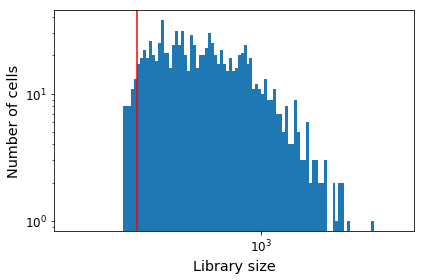

In [5]:
scprep.plot.plot_library_size(RNA_file, cutoff=250)

In [6]:
RNA_file = scprep.filter.filter_library_size(RNA_file, cutoff=250)
RNA_file.head()

,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A4GALT,AAAS,AACS,AACSP1,AADACL2-AS1,...,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,bP-21201H5.1,bP-21264C1.2,bP-2189O9.2,bP-2189O9.3
ACTTTCTAATCA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
GAGAGAAAACCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TACGGCTGTTAT,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
GACGCGTAAGTG,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
GAAAGGACTGCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We should also remove genes that are not expressed above a certain threshold, since they are not adding anything valuable to our analysis.

In [7]:
RNA_file = scprep.filter.filter_rare_genes(RNA_file, min_cells=10)
RNA_file.head()

,A2M,AAAS,AACS,AADAT,AAED1,AAK1,AAMDC,AAMP,AAR2,AARS,...,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,bP-2189O9.2
ACTTTCTAATCA,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
GAGAGAAAACCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
TACGGCTGTTAT,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
GACGCGTAAGTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
GAAAGGACTGCA,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


#### Normalizing your data

After filtering, the next steps are to perform library size normalization and transformation. Log transformation is frequently used for single-cell RNA-seq, however, this requires the addition of a pseudocount to avoid infinite values at zero. We instead use a square root transform, which has similar properties to the log transform but has no problem with zeroes.

In [8]:
RNA_file = scprep.normalize.library_size_normalize(RNA_file)
RNA_file = scprep.transform.sqrt(RNA_file)
RNA_file.head()

,A2M,AAAS,AACS,AADAT,AAED1,AAK1,AAMDC,AAMP,AAR2,AARS,...,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,bP-2189O9.2
ACTTTCTAATCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.732657,0.0,0.000000,1.732657,0.000000,0.000000,0.0,0.0,0.0
GAGAGAAAACCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,2.180622,0.000000,0.000000,0.000000,0.0,0.0,0.0
TACGGCTGTTAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.057596,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
GACGCGTAAGTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,2.087414,2.087414,0.0,0.0,0.0
GAAAGGACTGCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.065922,0.0,2.065922,0.000000,0.000000,0.000000,0.0,0.0,0.0


<a id="magic"></a>

### Running MAGIC



#### Creating the MAGIC operator

In [9]:
magic_op = magic.MAGIC()

#### Running MAGIC with gene selection


In [10]:
RNA_file_magic = magic_op.fit_transform(RNA_file, genes=["A2M", "AAAS", "AACS"])
RNA_file_magic.head()

Calculating MAGIC...
  Running MAGIC on 1007 cells and 9195 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.25 seconds.
    Calculating affinities...
    Calculated affinities in 0.15 seconds.
  Calculated graph and diffusion operator in 1.62 seconds.
  Calculating imputation...
Calculated MAGIC in 1.73 seconds.


,A2M,AAAS,AACS
ACTTTCTAATCA,1.114262,0.100677,0.095941
GAGAGAAAACCT,0.073290,0.089303,0.090966
TACGGCTGTTAT,0.034631,0.088239,0.082406
GACGCGTAAGTG,1.394960,0.042020,0.101148
GAAAGGACTGCA,0.930064,0.091350,0.200242


### Visualizing gene-gene relationships
<a id="genes"></a>


In [11]:
RNA_file['A2M']

ACTTTCTAATCA    0.000000
GAGAGAAAACCT    0.000000
TACGGCTGTTAT    0.000000
GACGCGTAAGTG    0.000000
GAAAGGACTGCA    0.000000
                  ...   
GCGAGGCCCTGA    0.000000
CTTTTATAATGT    0.000000
AGAAATACATTA    0.000000
GGCCGCCCGGGG    0.000000
ATAGTGCTCGCC    6.415003
Name: A2M, Length: 1007, dtype: float64

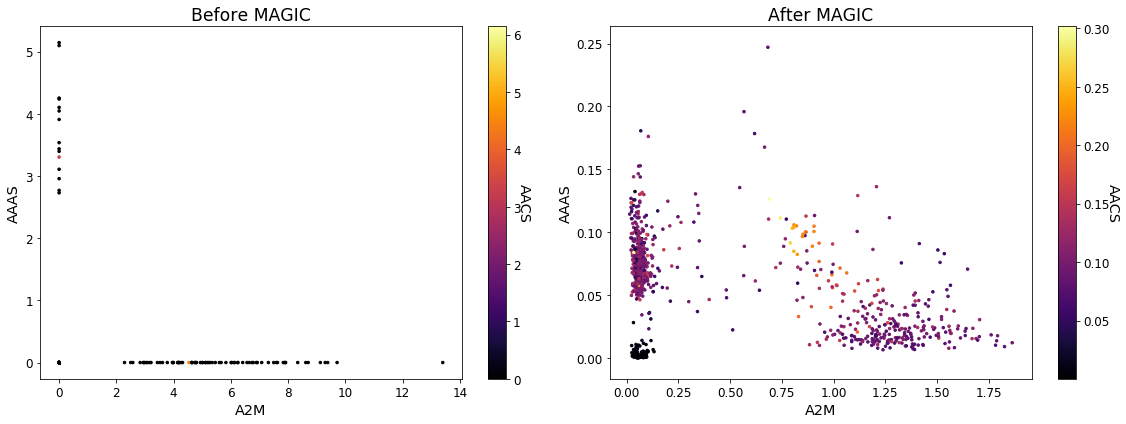

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=RNA_file['A2M'], y=RNA_file['AAAS'], c=RNA_file['AACS'],  ax=ax1,
                    xlabel='A2M', ylabel='AAAS', legend_title="AACS", title='Before MAGIC')

scprep.plot.scatter(x=RNA_file_magic['A2M'], y=RNA_file_magic['AAAS'], c=RNA_file_magic['AACS'], ax=ax2,
                    xlabel='A2M', ylabel='AAAS', legend_title="AACS", title='After MAGIC')

plt.tight_layout()
plt.show()

The original data suffers from dropout to the point that we cannot infer anything about the gene-gene relationships. As you can see, the gene-gene relationships are much clearer after MAGIC. These relationships also match the biological progression we expect to see - Ifitm1 is a stem cell marker, Klf1 is an erythroid marker, and Mpo is a myeloid marker.

#### Setting the MAGIC operator parameters


In [13]:
magic_op.set_params(t=5)

C:\Users\jashj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


MAGIC(a=None, decay=1, k=None, knn=5, knn_dist='euclidean', knn_max=15,
      n_jobs=1, n_pca=100, random_state=None, solver='exact', t=5, verbose=1)

We can now run MAGIC on the data again with the new parameters.

In [14]:
RNA_file_magic = magic_op.transform(genes=["A2M", "AAAS", "AACS"])
RNA_file_magic.head()

Calculating imputation...


,A2M,AAAS,AACS
ACTTTCTAATCA,1.139855,0.065659,0.108234
GAGAGAAAACCT,0.082327,0.079514,0.095180
TACGGCTGTTAT,0.055093,0.082031,0.087742
GACGCGTAAGTG,1.302611,0.041378,0.106324
GAAAGGACTGCA,1.108468,0.066793,0.155521


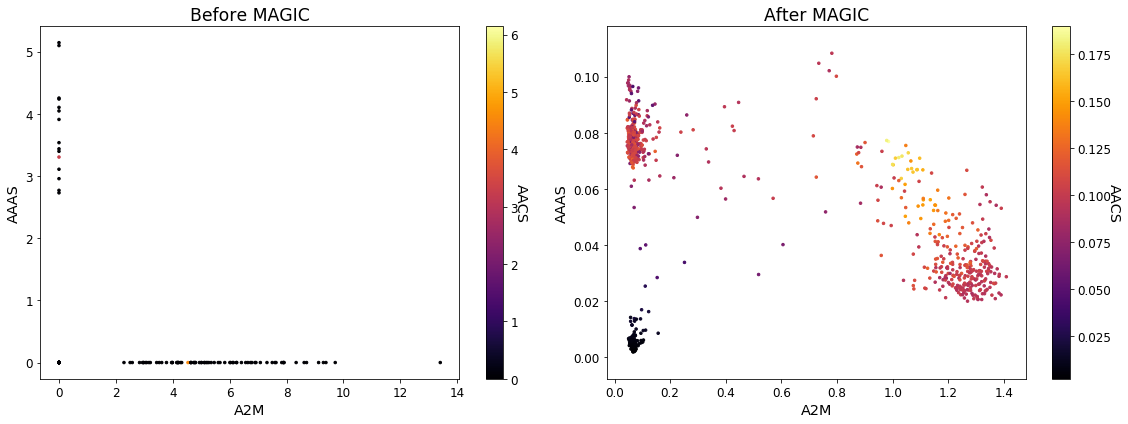

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=RNA_file['A2M'], y=RNA_file['AAAS'], c=RNA_file['AACS'],  ax=ax1,
                    xlabel='A2M', ylabel='AAAS', legend_title="AACS", title='Before MAGIC')

scprep.plot.scatter(x=RNA_file_magic['A2M'], y=RNA_file_magic['AAAS'], c=RNA_file_magic['AACS'], ax=ax2,
                    xlabel='A2M', ylabel='AAAS', legend_title="AACS", title='After MAGIC')

plt.tight_layout()
plt.show()

<a id="manifold"></a>

### Visualizing cell trajectories with PCA on MAGIC

In [16]:
RNA_file_magic_pca = magic_op.transform(genes="pca_only")
RNA_file_magic_pca.head()

Calculating imputation...


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
ACTTTCTAATCA,22.541008,-5.005555,-0.813904,-3.885776,2.775266,0.725107,0.263493,0.349014,-0.659373,0.625495,...,-0.015255,0.010505,0.008122,-0.000730,0.000812,-0.002457,0.008609,0.018884,-0.011525,0.004493
GAGAGAAAACCT,-10.551515,1.796721,7.753269,-0.718219,-0.192345,0.197151,-0.048332,0.083560,0.110636,0.036313,...,0.002189,0.005240,0.006167,-0.009242,0.005895,-0.000132,-0.004049,0.004556,-0.005579,0.007612
TACGGCTGTTAT,-9.023706,8.698643,14.796977,-0.400175,-0.073511,0.210344,0.171657,0.329340,0.132308,-0.052999,...,-0.003754,0.002288,0.001390,0.001202,-0.012110,0.007193,-0.000218,0.004961,0.014052,0.001256
GACGCGTAAGTG,26.301258,-4.223939,-0.533320,-2.466230,1.234195,0.159257,0.180344,0.217938,-0.601836,-0.000666,...,-0.000930,-0.000349,-0.000567,0.003389,0.000392,0.003025,0.000794,0.001382,-0.001428,-0.005063
GAAAGGACTGCA,27.327735,-4.904492,-0.527973,-2.350996,4.055287,1.139508,0.120481,-0.349880,0.659665,-0.187810,...,0.010003,-0.000643,-0.001173,0.008201,-0.005479,-0.003797,0.003928,-0.000224,-0.002132,-0.007461


We'll also perform PCA on the raw data for comparison.

In [17]:
from sklearn.decomposition import PCA
RNA_file_pca = PCA(n_components=3).fit_transform(np.array(RNA_file))

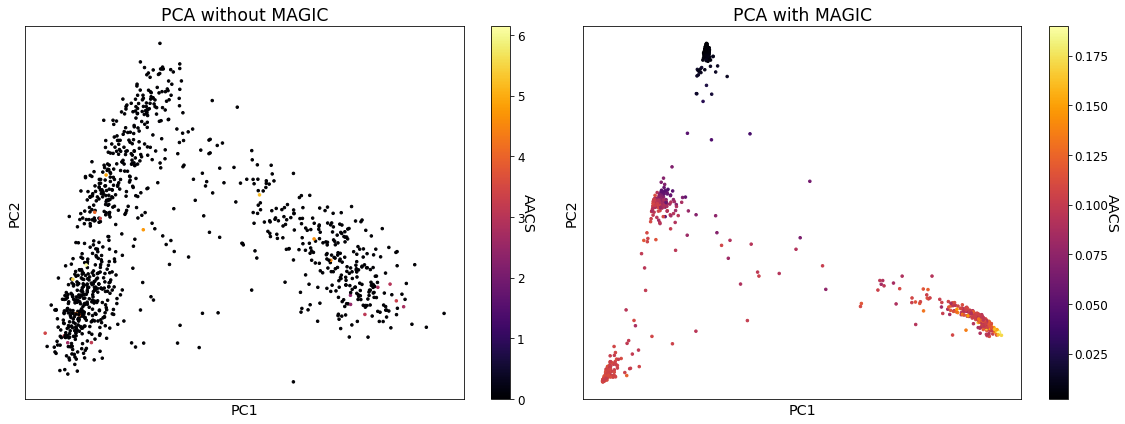

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter2d(RNA_file_pca, c=RNA_file['AACS'], 
                      label_prefix="PC", title='PCA without MAGIC',
                      legend_title="AACS", ax=ax1, ticks=False)

scprep.plot.scatter2d(RNA_file_magic_pca, c=RNA_file_magic['AACS'], 
                      label_prefix="PC", title='PCA with MAGIC',
                      legend_title="AACS", ax=ax2, ticks=False)

plt.tight_layout()
plt.show()

We can also plot this in 3D.

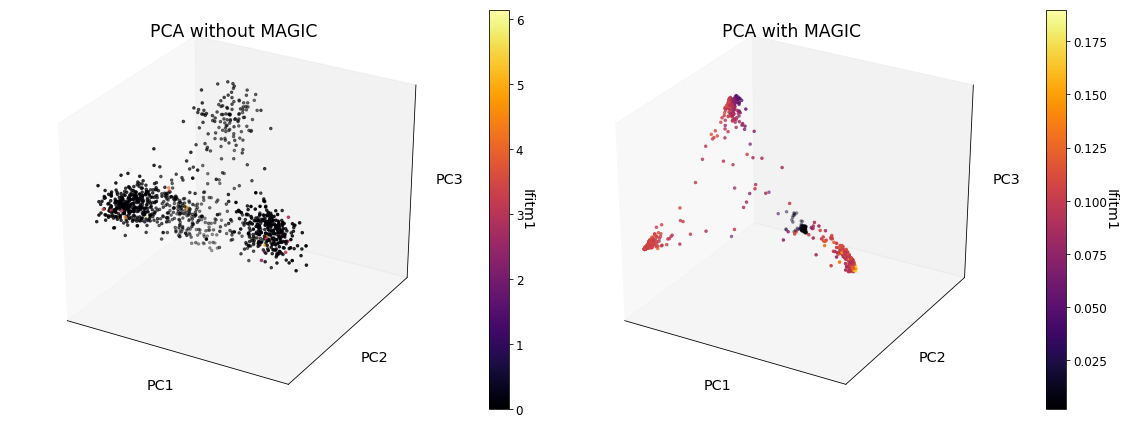

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6), subplot_kw={'projection':'3d'})

scprep.plot.scatter3d(RNA_file_pca, c=RNA_file['AACS'], 
                      label_prefix="PC", title='PCA without MAGIC',
                      legend_title="Ifitm1", ax=ax1, ticks=False)

scprep.plot.scatter3d(RNA_file_magic_pca, c=RNA_file_magic['AACS'], 
                      label_prefix="PC", title='PCA with MAGIC',
                      legend_title="Ifitm1", ax=ax2, ticks=False)

plt.tight_layout()
plt.show()

### Visualizing MAGIC values with PHATE

In complex systems, two dimensions of PCA are not sufficient to view the entire space. For this, PHATE is a suitable visualization tool which works hand in hand with MAGIC to view how gene expression evolves along a trajectory. For this, you will need to have installed PHATE. For help using PHATE, visit https://phate.readthedocs.io/.

In [20]:
#!pip install --user phate

In [21]:
import phate

In [22]:
data_phate = phate.PHATE().fit_transform(RNA_file)

Calculating PHATE...
  Running PHATE on 1007 observations and 9195 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.21 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.46 seconds.
  Calculating optimal t...
    Automatically selected t = 12
  Calculated optimal t in 1.06 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.12 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.46 seconds.
Calculated PHATE in 4.11 seconds.


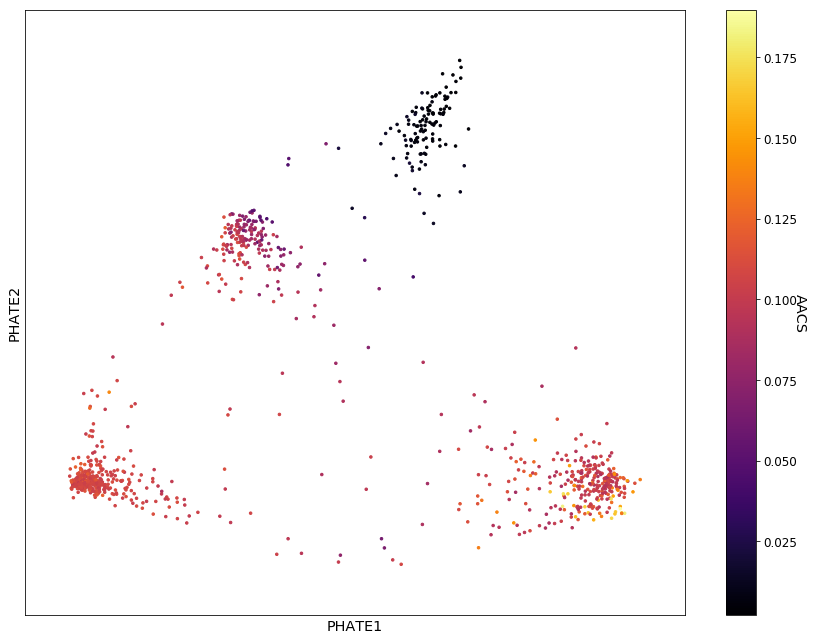

In [23]:
scprep.plot.scatter2d(data_phate, c=RNA_file_magic['AACS'], figsize=(12,9),
                      ticks=False, label_prefix="PHATE", legend_title="AACS")

Note that the structure of the data that we see here is much more subtle than in PCA. We see multiple branches at both ends of the trajectory. To learn more about PHATE, visit <https://phate.readthedocs.io/>.

### Exact vs approximate MAGIC


In [24]:
approx_magic_op = magic.MAGIC(solver="approximate")
approx_RNA_file_magic = approx_magic_op.fit_transform(RNA_file, genes='all_genes')

Calculating MAGIC...
  Running MAGIC on 1007 cells and 9195 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.14 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.22 seconds.
    Calculating affinities...
    Calculated affinities in 0.13 seconds.
  Calculated graph and diffusion operator in 1.52 seconds.
  Calculating imputation...
Calculated MAGIC in 1.75 seconds.


In [25]:
"A2M", "AAAS", "AACS"

('A2M', 'AAAS', 'AACS')

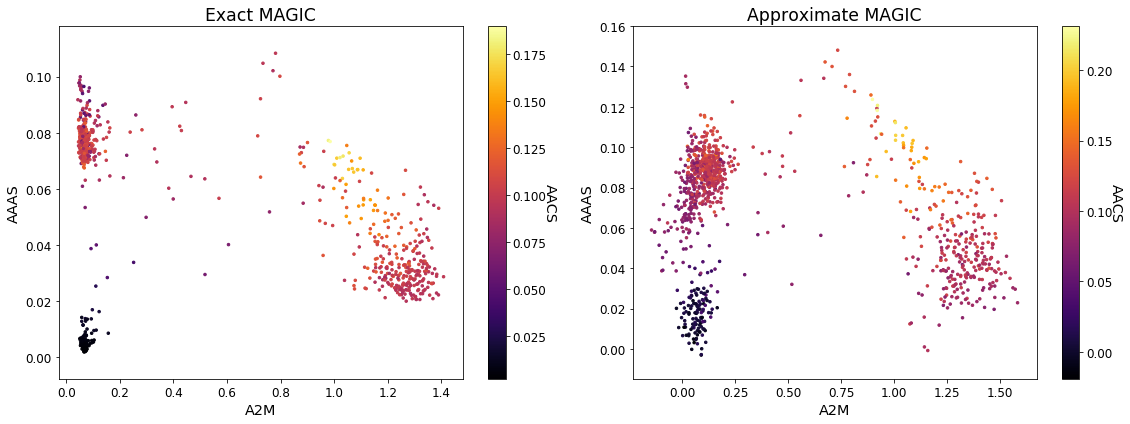

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=RNA_file_magic['A2M'], y=RNA_file_magic['AAAS'], c=RNA_file_magic['AACS'],  ax=ax1,
                    xlabel='A2M', ylabel='AAAS', legend_title="AACS", title='Exact MAGIC')

scprep.plot.scatter(x=approx_RNA_file_magic['A2M'], y=approx_RNA_file_magic['AAAS'], c=approx_RNA_file_magic['AACS'], ax=ax2,
                    xlabel='A2M', ylabel='AAAS', legend_title="AACS", title='Approximate MAGIC')

plt.tight_layout()
plt.show()

### Using the MAGIC smoothed data in downstream analysis


In [28]:
RNA_file_magic = magic_op.transform(genes="all_genes")
RNA_file_magic.head()

Running MAGIC with `solver='exact'` on 9195-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


,A2M,AAAS,AACS,AADAT,AAED1,AAK1,AAMDC,AAMP,AAR2,AARS,...,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,bP-2189O9.2
ACTTTCTAATCA,1.091388,0.046258,0.109441,0.080255,0.194183,0.162578,0.074315,0.021532,0.063807,0.254523,...,0.077595,0.025441,0.072022,0.114089,0.096803,0.067646,0.095834,0.092890,0.084059,0.037472
GAGAGAAAACCT,0.106462,0.075302,0.095737,0.054668,0.054506,0.187332,0.058021,0.042068,0.066505,0.784275,...,0.282215,0.035680,0.264757,0.240973,0.169670,0.028321,0.030609,0.101025,0.062708,0.274476
TACGGCTGTTAT,0.092074,0.077062,0.088514,0.028864,0.044566,0.224627,0.036585,0.039546,0.041556,1.042403,...,0.336727,0.030750,0.233953,0.255082,0.180641,0.010414,0.036878,0.105972,0.054975,0.419710
GACGCGTAAGTG,1.206813,0.039997,0.108308,0.082162,0.205198,0.166074,0.070797,0.019179,0.061586,0.228586,...,0.061909,0.020661,0.045358,0.091360,0.088502,0.067493,0.099838,0.093154,0.089091,0.029866
GAAAGGACTGCA,1.186151,0.044864,0.117285,0.081403,0.208792,0.166992,0.070028,0.018453,0.058890,0.229134,...,0.059668,0.023005,0.042871,0.094576,0.090905,0.068292,0.104715,0.096557,0.085017,0.027130


In [31]:
RNA_file_magic.to_csv("RNA_file_magic_T.csv")